# The Problem with JPEG Images

The JPEG image format uses a lossy compression in order to reduce file size. This uses a discrete cosine transform and scrambles the high spatial frequency (high resolution) information in the image. This notebook illustrates the loss of information when stored as a JPEG. I first tried this in `ImageJ` but decided it would be easier to do well using `Python` and the `scipy / numpy / scikit-image` stack with this `Jupyter` notebook.

First, import the packages we need and define a helper function...

In [1]:
%matplotlib inline
import os
from PIL import Image as pil
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave

figDim = 13

def plotImage(im, cmap='gray' , figsize=(7,8), cb=False, bare=True):
    r"""Plot an image in a tight layout

    Parameters
    ----------

    im : a numpy array
        The input image

    cmap : a string or plt.cm.colormap
        The colormap

    figsize : tuple (width, height), (7,8). default
        The size (in in) for the single figure.

    cb : boolean False, default
        Add a colorbar

    bare: boolean True, default
        Flag for no axis labels

    Returns
    -------
    None.

    Example
    --------
    from skimage import data

    img1 = data.camera()
    plotImage(img1, cmap='viridis', figsize=(5,5), bare=False)
    """
    from matplotlib import pyplot as plt
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1)
    cim = ax.imshow(im, cmap=cmap);
    if bare:
        ax.xaxis.set_visible(False);
        ax.yaxis.set_visible(False);
    if cb == True:
        # Create divider for existing axes instance
        div = make_axes_locatable(ax)
        # Append axes to the right of ax, with 10% width of ax
        cax = div.append_axes("right", size="10%", pad=0.05)
        # Create colorbar in the appended axes
        cbar = plt.colorbar(cim, cax=cax)
    else:
        fig.set_tight_layout(True)

## Load the exemplar image

Load an exemplar image, convert it to JPEG, store it, and open the JPEG image. Note that these are 8 bit per pixel grayscale images.

Note [StackOverflow](http://stackoverflow.com/questions/384759/pil-and-numpy) recommends

```
# Open I as an array:
> I = numpy.asarray(PIL.Image.open('test.jpg'))
# Do some stuff to I, then, convert it back to an image:
> im = PIL.Image.fromarray(numpy.uint8(I))
```

In [2]:
gitDir = os.getenv('GIT_HOME')
relImg = '/OSImageAnalysis/images/mandrill-gray.tif'
imgPth = gitDir + relImg
jpgPth = './mandrill-gray.jpg'

ori = imread(imgPth)
print(ori.shape, ori.dtype)

pim = pil.fromarray(np.uint8(ori))
pim.save(jpgPth, "JPEG", quality=85)

jpg = imread(jpgPth)
print(jpg.shape, jpg.dtype)

(512, 512) uint8
(512, 512) uint8


# Display the input image


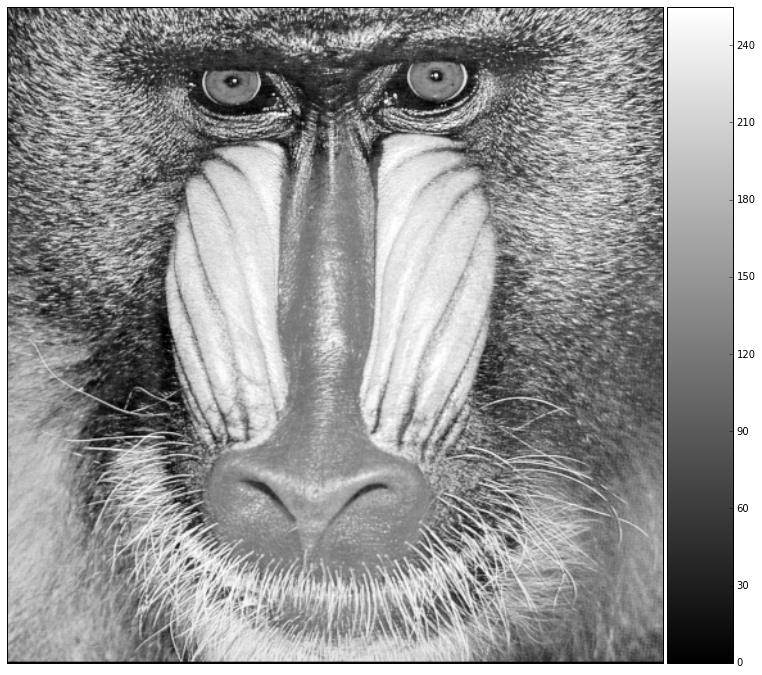

In [3]:
plotImage(ori, cmap='gray', figsize=(figDim,figDim), cb=True, bare=True);

# Calculate the difference

We want to convert these to floating point image, subtract them, and look at the difference. Let's use the `viridis` colormap to display the difference.

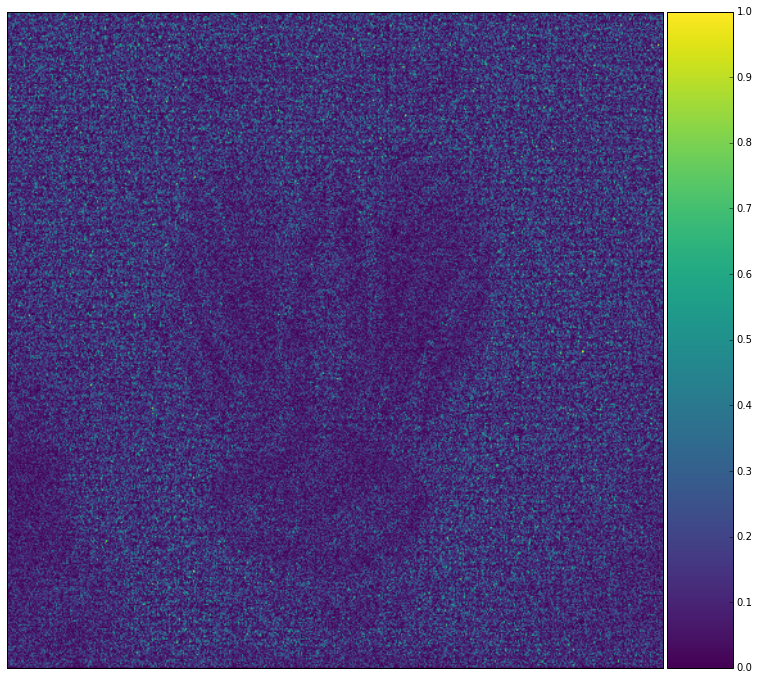

In [4]:
ori = ori.astype(float)
jpg = jpg.astype(float)
dif = np.abs(ori - jpg)

minV = np.min(dif)
maxV = np.max(dif)

dif -= minV
dif *= (1.0/maxV)

plotImage(dif, cmap='viridis', figsize=(figDim,figDim), cb=True, bare=True);